In [ ]:
!pip install pytorch_lightning

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl


import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_test_flat = x_test.reshape(x_test.shape[0], 784)

x_train_tensor = torch.tensor(x_train.reshape(x_train.shape[0], 784)).float()
y_train_tensor = torch.tensor(y_train).long() # CrossEntropyLoss expects Long type

x_test_tensor = torch.tensor(x_test.reshape(x_test.shape[0], 784)).float()
y_test_tensor = torch.tensor(y_test).long() # CrossEntropyLoss expects Long type

tensor(5)


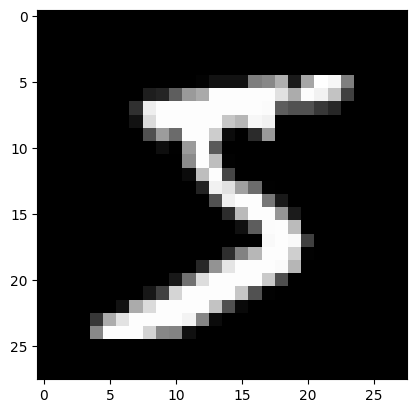

In [3]:
print(y_train_tensor[0])
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [12]:
class LitSimpleNN(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # logits
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = self.loss_fn(logits, y)
        self.log("train_loss", loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = self.loss_fn(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log("test_loss", loss)
        self.log("test_acc", acc)
model = LitSimpleNN()

In [13]:
from torch.utils.data import TensorDataset, DataLoader

# Suppose x_train_tensor is (N, 784) and y_train_tensor is (N,)
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [14]:
from pytorch_lightning import Trainer

model = LitSimpleNN()
trainer = Trainer(max_epochs=1)
trainer.fit(model, train_loader)

INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type             | Params | Mode 
-----------------------------------------------------
0 | fc1     | Linear           | 100 K  | train
1 | fc2     | Linear           | 8.3 K  | train
2 | fc3     | Linear           | 650    | train
3 | loss_fn | CrossEntropyLoss | 0      | train
-----------------------------------------------------
109 K     Trainable params
0         Non-trainable params
109 K     Total params
0.438     Total estimated model params size (MB)
4         Modules in train mode
0

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [15]:
trainer.test(model, test_loader)

/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:476: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9491999745368958     │
│         test_loss         │    0.1747589409351349     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.1747589409351349, 'test_acc': 0.9491999745368958}]